# **Data Science - IFB**

**TALES LIMA DE OLIVEIRA**

**_Lista 01 - 09/04/25_**

### *Caminho para os arquivos*

In [1]:
##### IMPORTAR DADOS DO DRIVE #####
from google.colab import drive
drive.mount('/content/drive')
path_ecom = '/content/drive/MyDrive/ColabNotebooks/Python/ifb_ds/ecommerce_purchases.csv'
path_conc = '/content/drive/MyDrive/ColabNotebooks/Python/ifb_ds/conceito_enade_2021.xlsx'

##### IMPORTAR DADOS DA PASTA LOCAL #####
# path_ecom = 'data/ecommerce_purchases.csv'
# path_conc = 'data/conceito_enade_2021.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exercício - Compras de Ecommerce  

Neste exercício, você receberá alguns dados falsos sobre algumas compras feitas pela Amazon! Basta seguir as instruções e tente dar melhor para responder as perguntas e completar as tarefas. Sinta-se a vontade para dar uma olhada nas soluções. A maioria das tarefas pode ser resolvida de diferentes maneiras. Para a maior parte, as perguntas ficam cada vez mais difíceis.

Importe pandas e leia o arquivo csv "Ecommerce Purchases" e configure-o para um DataFrame chamado ecom.

In [2]:
import pandas as pd
df_ecom = pd.read_csv(path_ecom)

Verifique o "head" do DataFrame.

In [3]:
df_ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


Quantas linhas e colunas existem?

In [4]:
rows, columns = df_ecom.shape
print(rows, columns)

10000 14


Qual é o preço de compra médio?

In [ ]:
average_price = df_ecom['Purchase Price'].mean()
print(f"${average_price:.2f}")

$50.35


Quais foram os preços de compra mais altos e mais baixos?

In [5]:
max_price = df_ecom['Purchase Price'].max()
min_price = df_ecom['Purchase Price'].min()

print(f"Max: ${max_price:.2f}")
print(f"Min: ${min_price:.2f}")

Max: $99.99
Min: $0.00


Quantas pessoas têm Inglês 'en' como sua língua de escolha no site?

In [6]:
num_english_users = (df_ecom['Language'] == 'en').sum()
print(num_english_users)

1098


Quantas pessoas têm o cargo de "Advogado" (lawyer)?

In [7]:
num_lawyers = df_ecom['Job'].str.contains(r'\blawyer\b', case=False, na=False).sum()
# num_lawyers = df_ecom['Job'].str.contains('Lawyer').sum()
print(num_lawyers)

30


Quantas pessoas fizeram a compra durante a AM e quantas pessoas fizeram a compra durante o PM?

*(Sugestão: Confira [value_counts ()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html))*

In [8]:
am_pm_counts = df_ecom['AM or PM'].value_counts()
print(am_pm_counts)

AM or PM
PM    5068
AM    4932
Name: count, dtype: int64


Quais são os 5 títulos de trabalho mais comuns?

In [9]:
top_5_job = df_ecom['Job'].value_counts().head(5)
print(top_5_job)

Job
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Designer, jewellery                  27
Name: count, dtype: int64


Alguém fez uma compra que veio do Lot: "90 WT", qual foi o preço de compra para esta transação?

In [10]:
price_for_lot_90wt = df_ecom[df_ecom['Lot'] == '90 WT']['Purchase Price'].iloc[0]
print(f"${price_for_lot_90wt:.2f}")

$75.10


Qual é o email da pessoa com o seguinte número do cartão de crédito: 4926535242672853

In [11]:
email_for_card = df_ecom[df_ecom['Credit Card'] == 4926535242672853]['Email'].iloc[0]
print(email_for_card)

bondellen@williams-garza.com


Quantas pessoas têm o American Express como seu fornecedor de cartão de crédito e fizeram uma compra acima de US $ 95?

In [12]:
num_american_express_above_95 = df_ecom[(df_ecom['CC Provider'] == 'American Express') & (df_ecom['Purchase Price'] > 95)].shape[0]
print(num_american_express_above_95)

39


Difícil: quantas pessoas tem um cartão de crédito que expira em 2025?

In [13]:
# df_ecom['CC Exp Date'] = df_ecom['CC Exp Date'].astype(str)

num_expiring_2025 = df_ecom[df_ecom['CC Exp Date'].str.endswith('25')].shape[0]
print(num_expiring_2025)

1033


Difícil: quais são os 5 principais provedores de e-mail / hosts mais populares (por exemplo, gmail.com, yahoo.com, etc ...)

In [14]:
df_ecom['Email Domain'] = df_ecom['Email'].str.split('@').str[1]
top_5_email_providers = df_ecom['Email Domain'].value_counts().head(5)
print(top_5_email_providers)

Email Domain
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64


## **Exercício - Conceito Enade**

1) Utilizando a base de dados conceito_enade_2021.xlsx, faça uma análise estatística e realize as plotagens que achar pertinente na exploração dos dados.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_conc = pd.read_excel(path_conc)

In [17]:
for c in df_conc.columns:
  print(f"Column: {c}")

Column: Ano
Column: Código da Área
Column: Área de Avaliação
Column: Grau Acadêmico
Column: Código da IES
Column: Nome da IES*
Column: Sigla da IES*
Column: Organização Acadêmica
Column: Categoria Administrativa
Column: Código do Curso
Column: Modalidade de Ensino
Column: Código do Município**
Column: Município do Curso**
Column: Sigla da UF** 
Column: Nº de Concluintes Inscritos
Column: Nº  de Concluintes Participantes
Column: Nota Bruta - FG
Column: Nota Padronizada - FG
Column: Nota Bruta - CE
Column: Nota Padronizada - CE
Column: Conceito Enade (Contínuo)
Column: Conceito Enade (Faixa)
Column: Observação


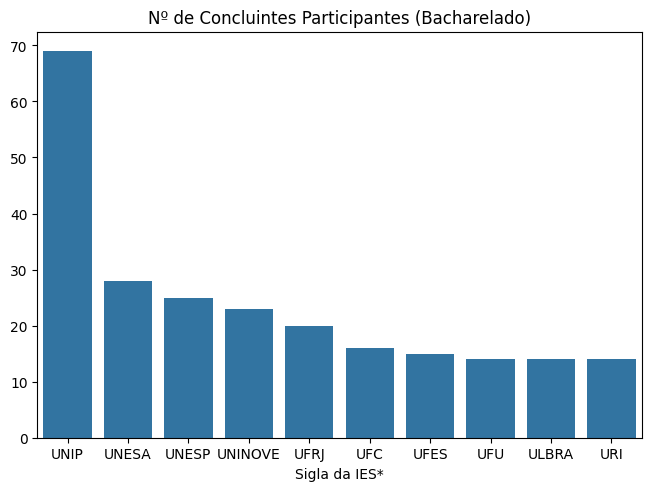

In [18]:
df_group = df_conc[df_conc['Grau Acadêmico'] == 'Bacharelado'].groupby('Sigla da IES*')['Nº  de Concluintes Participantes'].count().sort_values(ascending=False)

fig, ax = plt.subplots(layout='constrained')
sns.barplot(
    x = df_group.head(10).index,
    y = df_group.head(10).values
)

plt.title('Nº de Concluintes Participantes (Bacharelado)')
plt.show()

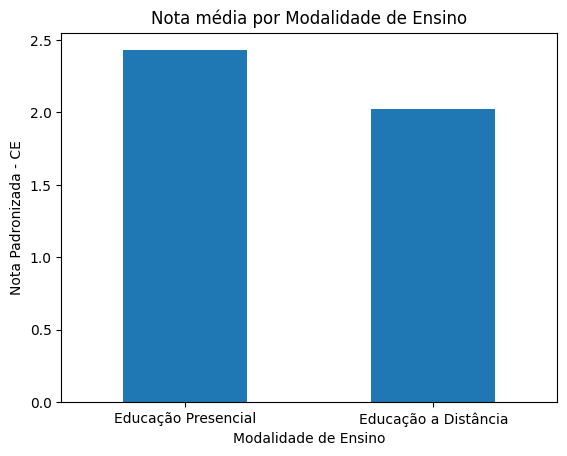

In [21]:
df_conc.groupby('Modalidade de Ensino')['Nota Padronizada - CE'].mean().plot(kind='bar')
plt.title('Nota média por Modalidade de Ensino')
plt.ylabel('Nota Padronizada - CE')
plt.xticks(rotation=0)
plt.show()

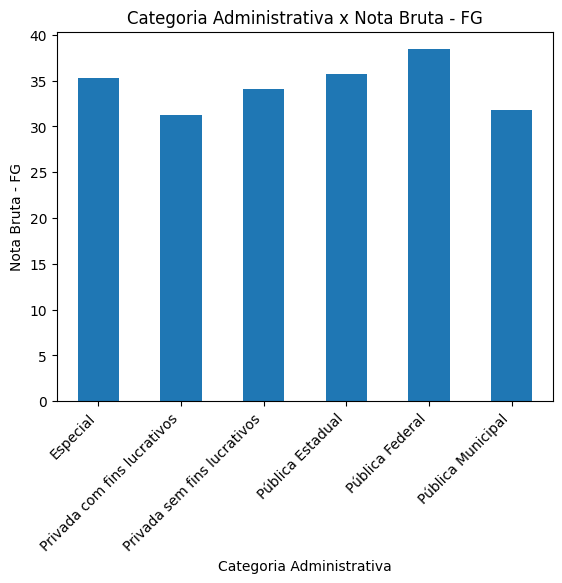

In [28]:
df_conc.groupby('Categoria Administrativa')['Nota Bruta - FG'].mean().plot(kind="bar")
plt.ylabel('Nota Bruta - FG')
plt.xlabel('Categoria Administrativa')
plt.title('Categoria Administrativa x Nota Bruta - FG')
plt.xticks(rotation=45, ha='right')
plt.show()

2) Utilizando a base de dados conceito_enade_2021.xlsx, construa um modelo de clusterização e analise os resultados encontrados.

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [32]:
# Seleção e limpeza dos dados
features = df_conc[['Nota Padronizada - FG', 'Nota Padronizada - CE', 'Nº  de Concluintes Participantes']]\
    .head(500)\
    .sort_values('Nº  de Concluintes Participantes', ascending=True)\
    .dropna()

In [33]:
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [34]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
features['Cluster'] = clusters

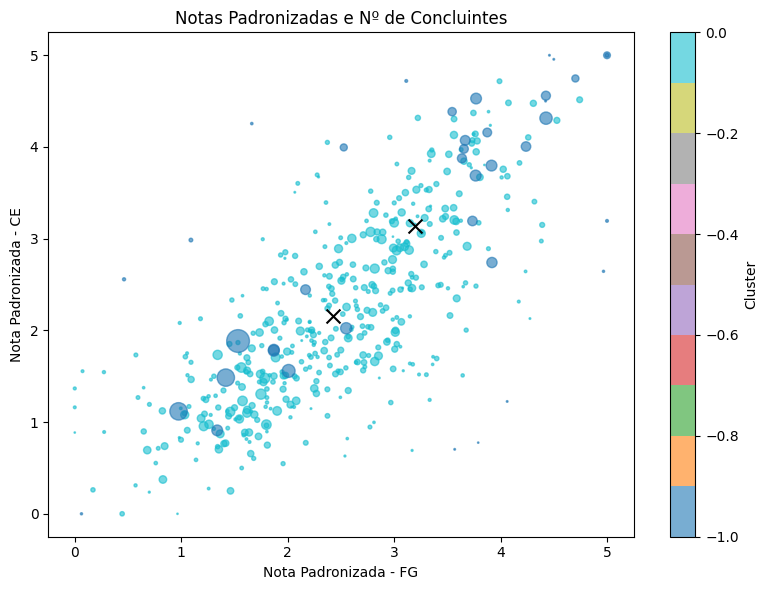

In [40]:
plt.figure(figsize=(8, 6))

# Scatterplot
scatter = plt.scatter(
    features['Nota Padronizada - FG'],
    features['Nota Padronizada - CE'],
    c=features['Cluster'],
    s=features['Nº  de Concluintes Participantes'] / 2,
    cmap='tab10',
    alpha=0.6
)

# Ponto médio (x) de cada cluster
for cluster_id in features['Cluster'].unique():
    cluster_data = features[features['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Nota Padronizada - FG'].mean(),
        cluster_data['Nota Padronizada - CE'].mean(),
        color='black',
        marker='x',
        s=100
    )

# Título e rótulos
plt.title('Notas Padronizadas e Nº de Concluintes')
plt.xlabel('Nota Padronizada - FG')
plt.ylabel('Nota Padronizada - CE')

# Barra de cor indicando os clusters
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.tight_layout()
plt.show()

### **Como interpretar este gráfico?**

**Insight 1:** Relação positiva:

Há uma correlação positiva clara entre Nota Padronizada - FG e Nota Padronizada - CE → conforme uma aumenta, a outra tende a aumentar também.

<br>

**Insight 2:** Agrupamentos distintos

O DBSCAN conseguiu identificar pelo menos dois grupos principais, que têm comportamentos semelhantes:

 - Grupo mais à direita → Alunos com notas altas em ambas as provas.

 - Grupo mais à esquerda → Alunos com notas um pouco mais baixas.

<br>

**Insight 3:** Outliers

Os pontos classificados como -1 são outliers — podem representar cursos ou instituições com desempenho muito diferente dos demais (para cima ou para baixo), ou com poucos concluintes.

<br>

**Insight 4:** Concluintes

O tamanho das bolhas mostra que há variação significativa no número de participantes:

Pontos grandes indicam instituições/cursos mais relevantes numericamente;

Eles ajudam a destacar quais grupos representam mais pessoas e podem ser mais relevantes para análises políticas ou institucionais.